<a href="https://colab.research.google.com/github/caleb173/SimpleTodoApp/blob/main/TrimmingBioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Instructions***

1.) Click on File on the top left corner and select save a copy in drive

Your changes will not be saved if you do not do this step

2.) Click on the name of the workbook in the top left corner and replace "Copy of" with your full name

# **Quality Control**

---


Quality control (QC) in the context of genomics and bioinformatics refers to the process of assessing and ensuring the quality of raw sequencing data before further analysis.

Quality control steps are essential to identify and address issues or artifacts that can arise during the sequencing process. The goal is to ensure that the data used for downstream analysis is accurate, reliable, and suitable for the intended analysis.


**Why Quality Control**

1.  ***Accurate Results***: helps us to identify and get rid of low quality data.
2.  ***Data Integrity***: prevent technical artifacts, such as sequencing errors, PCR duplicates, and adapter contamination, from affecting the integrity of the data.

1.  ***Cost and time saving***: Detecting and addressing issues early in the process prevents wasting time and computational resources on flawed data.
2.  ***Sequence contaminations***: High-quality data enhances the reproducibility of research, allowing other researchers to replicate findings based on the same dataset.

1.  ***Confidence in Interpretation***: High-quality data boosts confidence in the interpretation of results, enabling researchers to make confident conclusions based on reliable evidence.



There are different types of quality control tools but the most commonly used for illumina data is **[fastqc](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/)** which generates html report for each sample. Results of multiple samples are further summerised using **[multiqc](https://multiqc.info/)**.


#Practical excercise

We will be using our personal google drive accounts for these excercises.  so so will start up by  mounting our google drive acount into colab.

In [ ]:
#mount your google drive in colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The above command will prompt you to give it access to your google drive.

2) We will then download our input folder and create a copy of the folder in our google drive.



In [ ]:
#install gdown
!pip install gdown


In [ ]:
#download our work folder for this excercise
import gdown
gdown.download_folder("https://drive.google.com/drive/folders/1BrTb2bAOFu_fXY0LI3UHM0k_U01bv8r6?usp=sharing", quiet=True)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1AOR9hbo1b7wPh28pyQWUxH2-lGgYoE6Q 



In [ ]:
#copy file to onedrive
%cp -r /content/NigeriaBioinformaticsTraining /content/drive/MyDrive/


In [ ]:
#set path to excercise folder
data_path = '/content/drive/MyDrive/NigeriaBioinformaticsTraining'


**Introduction To Basic Linux commands**


In [ ]:
#See current directory
!pwd

/content


In [ ]:
#change directory
%cd $data_path

/content/drive/MyDrive/NigeriaBioinformaticsTraining


In [ ]:
#confirm that your directory is changed
!pwd

/content/drive/MyDrive/NigeriaBioinformaticsTraining


In [ ]:
#See list of files in our excercise folder
!ls


Fastq  newRef


In [ ]:
#see list of files in fastq folder
!ls Fastq

MC-023_S318_L001_R1_001.fastq.gz  MC-095_S295_L001_R2_001.fastq.gz
MC-023_S318_L001_R2_001.fastq.gz  MC-096_S315_L001_R1_001.fastq.gz
MC-032_S303_L001_R1_001.fastq.gz  MC-096_S315_L001_R2_001.fastq.gz
MC-032_S303_L001_R2_001.fastq.gz  PE-NVN-541_S144_L001_R1_001.fastq.gz
MC-095_S295_L001_R1_001.fastq.gz  PE-NVN-541_S144_L001_R2_001.fastq.gz


In [ ]:
#see the first 10 lines of your fastq file
!zcat Fastq/MC-023_S318_L001_R1_001.fastq.gz|head -n 10

@M05061:119:000000000-KLYPH:1:1101:17282:1001 1:N:0:318
NAATGTTTGAAATGATAAATGAATGGCAGCTTGGC
+
#8CCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
@M05061:119:000000000-KLYPH:1:1101:17734:1002 1:N:0:318
NATGTAATTTTTGTTGTGTATTTATTACAACTTTGCCGGAAGCACCTTCATTTATCATTTCAAACAT
+
#8ABCGGFGGFDGGCFEECFFAFGFGGGGGGC9E9EGE@GGCGAFGG@FGG9FGCCCGGCGGGCFGG
@M05061:119:000000000-KLYPH:1:1101:12529:1004 1:N:0:318
NCGTTAATAATAAATACACGCAGGTAACTATAGTTTTGTAACATCCGGCCCTCCGTTAATAATAAATACACGCAGGTTACAAAACTATAGTTTTGTAACATCCGGGTAACTATAGTTTTGTAACATCCGGGTAACTATAGTTTTGTAAAATCCGAGATCGGAAAAGCACACGTCTGAAAACCAATCACAAAATCGTATCTCGTATGCCATCATCTGCCTGAAAAAAAAAAAAACAACAAACAAAAAAAAC


**Structure of Fastq File**

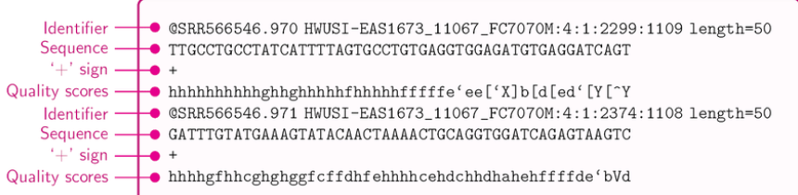

**About Our data**

For today's session, we will be working on 5 paired end Plasmodium Falciparum samples which are generated from illumina sequencing.

In [ ]:
#Install fastqc

!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip #download
!unzip fastqc_v0.11.9.zip #unzip
!chmod +x FastQC/fastqc #make executable


--2023-09-20 11:12:43--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
Resolving www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10249221 (9.8M) [application/zip]
Saving to: ‘fastqc_v0.11.9.zip’

fastqc_v0.11.9.zip  100%[===================>]   9.77M  9.53MB/s    in 1.0s    

2023-09-20 11:12:44 (9.53 MB/s) - ‘fastqc_v0.11.9.zip’ saved [10249221/10249221]

Archive:  fastqc_v0.11.9.zip
  inflating: FastQC/cisd-jhdf5.jar   
   creating: FastQC/Configuration/
  inflating: FastQC/Configuration/adapter_list.txt  
  inflating: FastQC/Configuration/contaminant_list.txt  
  inflating: FastQC/Configuration/limits.txt  
  inflating: FastQC/fastqc           
  inflating: FastQC/fastqc_icon.ico  
   creating: FastQC/Help/
   creating: FastQC/Help/1 Introductio

In [ ]:
#Create directory
!mkdir fastqcOutput

In [ ]:
#Run fastqc on multiple fastq files
!FastQC/fastqc Fastq/* -o fastqcOutput

Started analysis of MC-023_S318_L001_R1_001.fastq.gz
Approx 5% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 10% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 15% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 20% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 25% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 30% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 35% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 40% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 45% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 50% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 55% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 60% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 65% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 70% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 75% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 80% complete for MC-023_S318_L001_R1_001.fastq.gz
Approx 85% complete for MC-023_S318_

Lets review one of the fastqc html files!

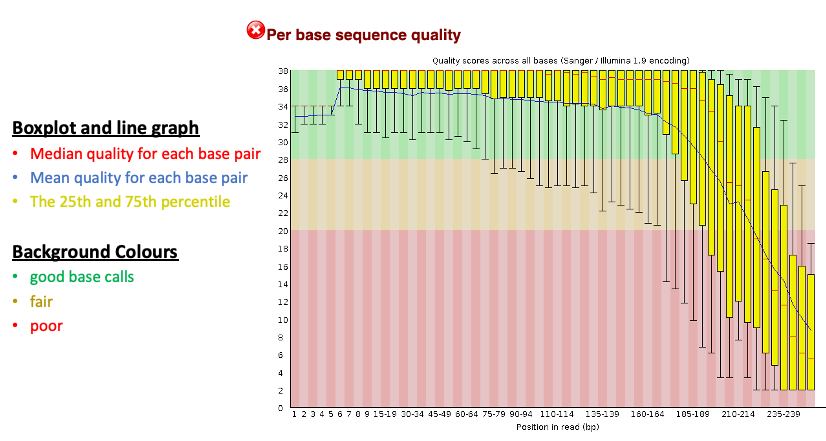

In [ ]:
#Install multiqc
!pip install multiqc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.8 MB/s eta 0:00:00
  Created wheel for spectra: filename=spectra-0.0.11-py3-none-any.whl size=17466 sha256=fdd2f6fa2269b528645e11de87e8a89a44aae5b29219a7339c5d108a8d40f666
  Stored in directory: /root/.cache/pip/wheels/bc/27/ec/cddaa9489a49ddcf702e1f4dc1791db28a3b0121e1ff254f97
  Created wheel for lzstring: filename=lzstring-1.0.4-py2.py3-none-any.whl size=4567 sha256=f8deb38accb8976ac7bd59ded001e79ba28a7a5d604232a77ab8d5cd945cfc07
  Stored in directory: /root/.cache/pip/wheels/aa/25/dc/ef10d6c8d762029393d3ef1710c63a7d6714bf1db32d04f3ad
  Created wheel for colormath: fi

When working with [multiple](https://multiqc.info/) samples, it is not practical to go through the qc result for each sample. We therefore use multiqc to get a summary of the results obtained from our quality control.

In [ ]:
#Run multiqc on fatqc results
!mkdir -p multiqcOutput
!multiqc /content/drive/MyDrive/NigeriaBioinformaticsTraining/fastqcOutput -o /content/drive/MyDrive/NigeriaBioinformaticsTraining/fastqcOutput/multiqcOutput


  /// ]8;id=201764;https://multiqc.info\MultiQC]8;;\ 🔍 | v1.15

|           multiqc | Search path : /content/drive/MyDrive/NigeriaBioinformaticsTraining/fastqcOutput
|         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 20/20  
|            fastqc | Found 10 reports
|           multiqc | Report      : fastqcOutput/multiqcOutput/multiqc_report.html
|           multiqc | Data        : fastqcOutput/multiqcOutput/multiqc_data
|           multiqc | MultiQC complete


**Lets go through the multiQC result.**

**Question**\
What do you think about the overall quality of the data?

\\

# **Trimming**
 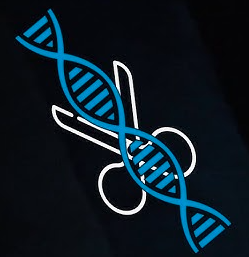


---



# Importance of trimming

---



FASTQ files contain sequencing reads along with quality scores for each base in the read. Trimming FASTQ files is an important preprocessing step in the analysis of sequencing data, and it serves several purposes:

***Quality Improvement:*** Sequencing reads often have regions of lower-quality bases toward the ends, which can affect downstream analyses. Trimming removes these low-quality bases, improving the overall quality of the reads.

***Read Length Uniformity:*** Trimming helps to standardize the read length across all reads. This is important for aligning reads to a reference genome and other downstream analyses, as tools often expect reads of consistent lengths.

***Adapter Removal:*** During library preparation, adapter sequences are added to the ends of DNA fragments. Trimming removes these adapters, which can otherwise interfere with downstream analyses or cause alignment artifacts.

***Removal of Artifacts:*** Trimming can help remove artifacts such as PCR duplicates, homopolymer errors, and other sequencing artifacts that can impact the accuracy of downstream analyses.

***Reducing Computational Load:*** By removing low-quality bases and unnecessary adapters, the size of the data is reduced, leading to faster processing and requiring less storage space.

***Improved Mapping:*** Removing low-quality bases and adapters increases the likelihood of successful alignment of reads to a reference genome, leading to more accurate variant calling and other downstream analyses.

***Enhanced Interpretation:*** Trimming improves the accuracy of interpreting results by reducing the noise introduced by low-quality bases and artifacts.

***Mitigating Batch Effects:*** In multi-sample studies, trimming helps to standardize read quality and length across different samples, reducing batch effects and enhancing comparability.

Trimming can be performed using various tools and software packages, such as **Trimmomatic**, **Cutadapt**, **Fastp**, **trim Galore**, **Skewer**, etc.

The specific trimming steps and parameters used depend on the quality of the data, the library preparation method, the sequencing platform, and the downstream analysis goals.

***Overall, trimming helps to ensure that the sequencing data used in downstream analyses are of high quality, accurate, and reliable, leading to more meaningful and reproducible results.***

For this tutorial, We will be using [***Trimmomatic***](http://www.usadellab.org/cms/index.php?page=trimmomatic).









#***Trimmomatic Trimming Process***

---



**Trimmomatic (Paired Reads)**

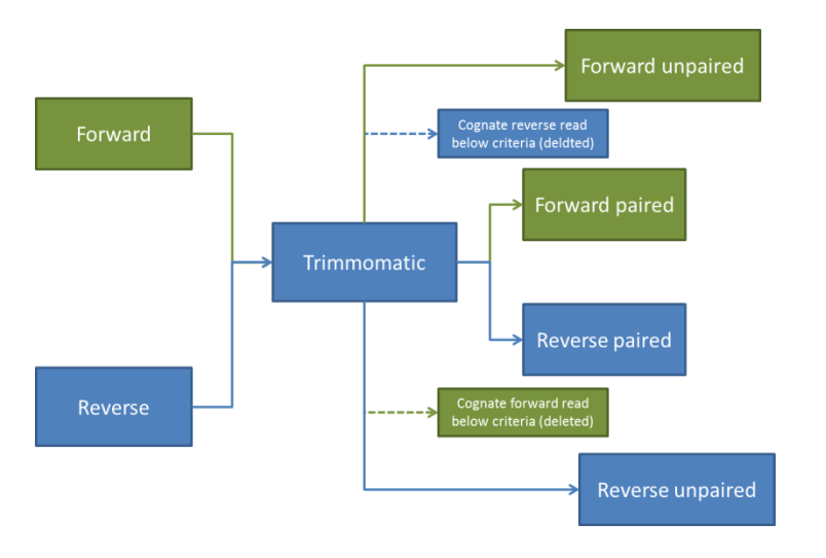

**Illuminaclip:-** is often used as a parameter in adapter trimming tools like Trimmomatic and Cutadapt. When specifying "IlluminaClip," you typically provide the path to a file containing the adapter sequences and set parameters to control how the adapters are identified and removed.


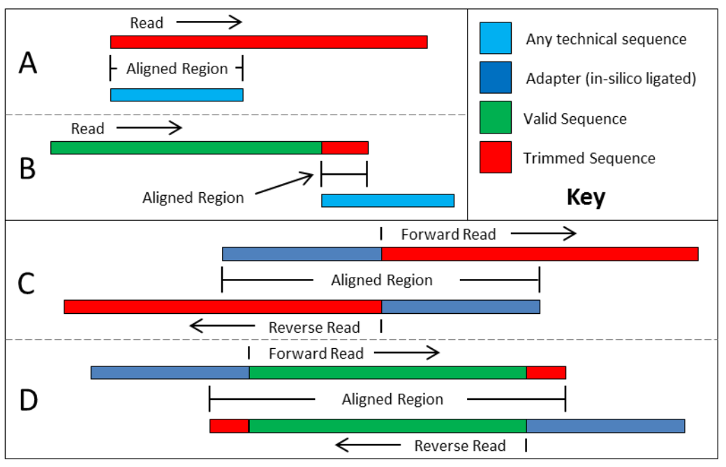

**Slidingwindow:-** removes low quality ends of reads. It involves moving a fixed-size window (often a small number of bases) along the length of a read. At each position of the window, the average quality score of the bases within the window is calculated. A threshold quality score is set as a criterion. If the average quality score within the window falls below this threshold, it indicates a region of low-quality bases and therefore trimmed off.



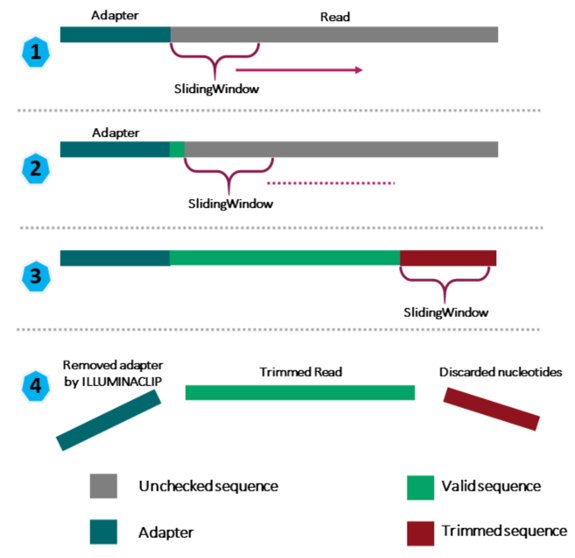

In [ ]:
#Install trimmomatic
!apt-get install openjdk-8-jre-headless -qq  # Install Java
!wget http://www.usadellab.org/cms/uploads/supplementary/Trimmomatic/Trimmomatic-0.39.zip  # Download Trimmomatic
!unzip Trimmomatic-0.39.zip  # Unzip the downloaded file


Selecting previously unselected package libxtst6:amd64.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../libxtst6_2%3a1.2.3-1build4_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1build4) ...
Selecting previously unselected package openjdk-8-jre-headless:amd64.
Preparing to unpack .../openjdk-8-jre-headless_8u382-ga-1~22.04.1_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u382-ga-1~22.04.1) ...
Setting up libxtst6:amd64 (2:1.2.3-1build4) ...
Setting up openjdk-8-jre-headless:amd64 (8u382-ga-1~22.04.1) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Processing triggers for libc-bin (2.35-0ub

In [ ]:
#show content of trimmomatic folder
!ls Trimmomatic-0.39

adapters  LICENSE  trimmomatic-0.39.jar


In [ ]:
#java is already installed in colab
!java -version

openjdk version "11.0.20.1" 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [ ]:
#show current path
!pwd

/content/drive/MyDrive/NigeriaBioinformaticsTraining


In [ ]:
#Show usage command
!java -jar /content/drive/MyDrive/NigeriaBioinformaticsTraining/Trimmomatic-0.39/trimmomatic-0.39.jar -h

Usage: 
       PE [-version] [-threads <threads>] [-phred33|-phred64] [-trimlog <trimLogFile>] [-summary <statsSummaryFile>] [-quiet] [-validatePairs] [-basein <inputBase> | <inputFile1> <inputFile2>] [-baseout <outputBase> | <outputFile1P> <outputFile1U> <outputFile2P> <outputFile2U>] <trimmer1>...
   or: 
       SE [-version] [-threads <threads>] [-phred33|-phred64] [-trimlog <trimLogFile>] [-summary <statsSummaryFile>] [-quiet] <inputFile> <outputFile> <trimmer1>...
   or: 
       -version


## **Processing Steps**

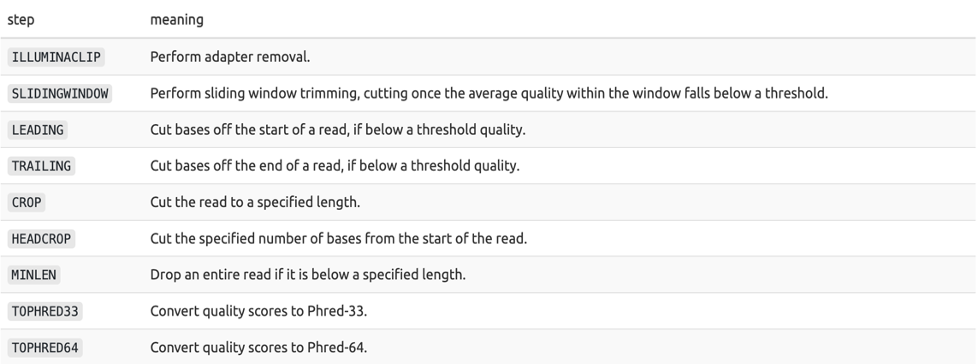

We will use the executable **trimmomatic-0.39.jar** file.

Some commonly used illumina Adapter sequences can be found in the **adapters** folder.

In [ ]:
!mkdir trimmedPaired trimmedUnpaired

In [ ]:
#Run trimmomatic command

!java -jar Trimmomatic-0.39/trimmomatic-0.39.jar PE -phred33 \
Fastq/MC-023_S318_L001_R1_001.fastq.gz Fastq/MC-023_S318_L001_R2_001.fastq.gz \
trimmedPaired/MC-023_S318_L001_paired_R1_001.fastq.gz trimmedUnpaired/MC-023_S318_L001_unpaired_R1_001.fastq.gz \
trimmedPaired/MC-023_S318_L001_paired_R2_001.fastq.gz trimmedUnpaired/MC-023_S318_L001_unpaired_R2_001.fastq.gz \
ILLUMINACLIP:Trimmomatic-0.39/adapters/TruSeq3-PE.fa:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36


TrimmomaticPE: Started with arguments:
 -phred33 Fastq/MC-023_S318_L001_R1_001.fastq.gz Fastq/MC-023_S318_L001_R2_001.fastq.gz trimmedPaired/MC-023_S318_L001_paired_R1_001.fastq.gz trimmedUnpaired/MC-023_S318_L001_unpaired_R1_001.fastq.gz trimmedPaired/MC-023_S318_L001_paired_R2_001.fastq.gz trimmedUnpaired/MC-023_S318_L001_unpaired_R2_001.fastq.gz ILLUMINACLIP:Trimmomatic-0.39/adapters/TruSeq3-PE.fa:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36
Multiple cores found: Using 2 threads
Using PrefixPair: 'TACACTCTTTCCCTACACGACGCTCTTCCGATCT' and 'GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCT'
ILLUMINACLIP: Using 1 prefix pairs, 0 forward/reverse sequences, 0 forward only sequences, 0 reverse only sequences
Input Read Pairs: 879972 Both Surviving: 768118 (87.29%) Forward Only Surviving: 88773 (10.09%) Reverse Only Surviving: 4320 (0.49%) Dropped: 18761 (2.13%)
TrimmomaticPE: Completed successfully


When using trimmed reads for alignment, you typically use the paired-end files that passed the trimming process. These are the files containing reads where both pairs have survived the quality filtering and trimming steps. In our case, these are stored in the folder called "trimmedPaired".

\

**Working with multiple files**

\
When working with multiple files, it is preferable to run these processes in ***parallel*** to maximize the speed of execution. However, running parallel programs can be memory-intensive, making it less suitable for personal computers with limited RAM.

If your system has a small amount of available RAM, it is advisable to use a ***loop*** instead. Loops may be slower, but they are a more memory-efficient approach that can successfully accomplish the task.

We will be using loops in our excercises for this training.

\

***Understand the concept of loops***

*What is a Loop?*

A loop is a fundamental concept in programming. It's a way to repeat a set of instructions multiple times. Imagine if you had to write the same line of code over and over again - it would be time-consuming and prone to errors. A loop helps automate this process.




In [ ]:
%cd /content/drive/MyDrive/NigeriaBioinformaticsTraining
!pwd

/content/drive/MyDrive/NigeriaBioinformaticsTraining
/content/drive/MyDrive/NigeriaBioinformaticsTraining


In [ ]:
import os
import glob

# Specify the pattern you want to match
pattern = '/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/*'  # This example matches all .R1_001.fastq.gz files

# Get a list of files matching the pattern
file_list = glob.glob(pattern)
print(file_list)

['/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/MC-023_S318_L001_R1_001.fastq.gz', '/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/MC-023_S318_L001_R2_001.fastq.gz', '/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/MC-032_S303_L001_R2_001.fastq.gz', '/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/MC-032_S303_L001_R1_001.fastq.gz', '/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/MC-095_S295_L001_R1_001.fastq.gz', '/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/MC-096_S315_L001_R1_001.fastq.gz', '/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/MC-095_S295_L001_R2_001.fastq.gz', '/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/MC-096_S315_L001_R2_001.fastq.gz', '/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/PE-NVN-541_S144_L001_R1_001.fastq.gz', '/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/PE-NVN-541_S144_L001_R2_001.fastq.gz']


In [ ]:
import os
import glob

# Specify the pattern you want to match
pattern = '/content/drive/MyDrive/NigeriaBioinformaticsTraining/Fastq/*R1_001.fastq.gz'  # This example matches all .R1_001.fastq.gz files

# Get a list of files matching the pattern
file_list = glob.glob(pattern)

for infile in file_list:
    base = os.path.basename(infile)
    base = base.replace('_R1_001.fastq.gz', '')
    print(base)
    input_forward = f'Fastq/{base}_R1_001.fastq.gz'
    input_reverse = f'Fastq/{base}_R2_001.fastq.gz'
    output_forward_paired = f'trimmedPaired/{base}_paired_R1_001.fastq.gz'
    output_forward_unpaired = f'trimmedUnpaired/{base}_unpaired_R1_001.fastq.gz'
    output_reverse_paired = f'trimmedPaired/{base}_paired_R2_001.fastq.gz'
    output_reverse_unpaired = f'trimmedUnpaired/{base}_unpaired_R2_001.fastq.gz'

    !java -jar Trimmomatic-0.39/trimmomatic-0.39.jar PE -phred33 \
    {input_forward} {input_reverse} \
    {output_forward_paired} {output_forward_unpaired} \
    {output_reverse_paired} {output_reverse_unpaired} \
    ILLUMINACLIP:Trimmomatic-0.39/adapters/TruSeq3-PE.fa:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36


MC-023_S318_L001
TrimmomaticPE: Started with arguments:
 -phred33 Fastq/MC-023_S318_L001_R1_001.fastq.gz Fastq/MC-023_S318_L001_R2_001.fastq.gz trimmedPaired/MC-023_S318_L001_paired_R1_001.fastq.gz trimmedUnpaired/MC-023_S318_L001_unpaired_R1_001.fastq.gz trimmedPaired/MC-023_S318_L001_paired_R2_001.fastq.gz trimmedUnpaired/MC-023_S318_L001_unpaired_R2_001.fastq.gz ILLUMINACLIP:Trimmomatic-0.39/adapters/TruSeq3-PE.fa:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36
Multiple cores found: Using 2 threads
Using PrefixPair: 'TACACTCTTTCCCTACACGACGCTCTTCCGATCT' and 'GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCT'
ILLUMINACLIP: Using 1 prefix pairs, 0 forward/reverse sequences, 0 forward only sequences, 0 reverse only sequences
Input Read Pairs: 879972 Both Surviving: 768118 (87.29%) Forward Only Surviving: 88773 (10.09%) Reverse Only Surviving: 4320 (0.49%) Dropped: 18761 (2.13%)
TrimmomaticPE: Completed successfully
MC-032_S303_L001
TrimmomaticPE: Started with arguments:
 -phred33 Fastq/MC-03

In [ ]:
!ls trimmedPaired/


MC-023_S318_L001_paired_R1_001.fastq.gz
MC-023_S318_L001_paired_R2_001.fastq.gz
MC-032_S303_L001_paired_R1_001.fastq.gz
MC-032_S303_L001_paired_R2_001.fastq.gz
MC-095_S295_L001_paired_R1_001.fastq.gz
MC-095_S295_L001_paired_R2_001.fastq.gz
MC-096_S315_L001_paired_R1_001.fastq.gz
MC-096_S315_L001_paired_R2_001.fastq.gz
PE-NVN-541_S144_L001_paired_R1_001.fastq.gz
PE-NVN-541_S144_L001_paired_R2_001.fastq.gz


**Excercise:-** check quality of your the trimmed fastq files and apply multiqc on your fastqc results.

How does you current result compare to the previous one obtained before trimming?